

- After doing linear regression with stats model OLS using log transformed variables, should we be inverse transforming and getting the results summary for better interpretability? What would the code for that look like? 

-I’ve engineered a bunch of boolean or categorical one hot encoded features, and on a correlation matrix, their columns/rows appear blank. Did I mess up? 

-What sort of r-squared are folks getting on their models? I managed one of .610 but changed my approach and can’t seem to get above .55, it seems as though the more I engineer (to me) good features and add them the lower the score and eliminating them for some reason doesn’t help(see above about stepwise/changing model predictors in general not reflecting in results)? What steps can I take to improve my model in general in feature engineering and selection?

-I keep getting warnings about collinearity from stats model, but running tests for collinearity either indicates there is little or that to make a non collinear model I’d need to have a very small feature space and a weak r squared. What could cause this?
# yr_renovated as age since built/last touched
# Explore zip codes
# Comment back in plots when appropriate
# Walk score add on

In [1]:
# Importing libraries

from math import sqrt
import numpy as np 
import pandas as pd 
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#need to clean this up

# Reading in data and examining

In [2]:
df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


# Looks like there's some NaN in the data, time for a null values and type check, null values in 'waterfront', 'view' and 'yr_renovated' features, objects in date and sqft_basement

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.shape

(21597, 21)

In [6]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

# View is predominately zero, meaning lacking a view
# Transform view into categories.

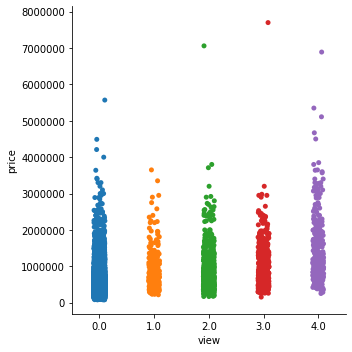

In [9]:
sns.catplot(x='view', y='price', data=df)

In [10]:
df['view'].value_counts(dropna=False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [11]:
df['view'] = df['view'].fillna(0).astype(int)

df['view'].value_counts(dropna=False)

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

# One hot encoding view into separate features

In [12]:
view_le = LabelEncoder()
view_labels = view_le.fit_transform(df['view'])
df['view_label'] = view_labels
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_label
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0


In [13]:
view_ohe = OneHotEncoder()
view_feature_arr = view_ohe.fit_transform(
                                df[['view_label']]).toarray()
view_feature_labels = ['view__'+str(cls_label) 
                           for cls_label in view_le.classes_]
view_features = pd.DataFrame(view_feature_arr, 
                            columns=view_feature_labels)

/Users/michael/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
df.reset_index(drop=True, inplace=True)
view_features.reset_index(drop=True, inplace=True)

In [15]:
df.drop('view_label', axis=1, inplace=True)

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [17]:
view_features.head()

,view__0,view__1,view__2,view__3,view__4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [18]:
df = pd.concat([df, view_features], axis=1)

df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0,...,98178,47.5112,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,98125,47.7210,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,98028,47.7379,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,98136,47.5208,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,98074,47.6168,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0,...,98053,47.6561,-122.005,4760,101930,1.0,0.0,0.0,0.0,0.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0,...,98003,47.3097,-122.327,2238,6819,1.0,0.0,0.0,0.0,0.0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0,...,98198,47.4095,-122.315,1650,9711,1.0,0.0,0.0,0.0,0.0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0,...,98146,47.5123,-122.337,1780,8113,1.0,0.0,0.0,0.0,0.0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0,...,98038,47.3684,-122.031,2390,7570,1.0,0.0,0.0,0.0,0.0


In [19]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
view__0          False
view__1          False
view__2          False
view__3          False
view__4          False
dtype: bool

# Waterfront is the next variable of interest - and mostly 0, so imputing NaN with 0s.

In [20]:
df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [21]:
df['waterfront'] = df['waterfront'].fillna(0)

df['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

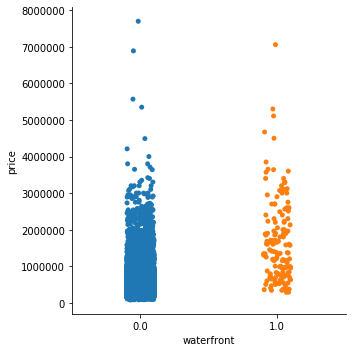

In [22]:
sns.catplot(x='waterfront', y='price', data=df)

In [23]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
view__0             0
view__1             0
view__2             0
view__3             0
view__4             0
dtype: int64

# Keeping yr_renovated, filling with 0s, creating new feature off of yr_renovated

In [24]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [25]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [26]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

# Extract only housing that was renovated, as well as the gap between building and renovation in years

In [27]:
# code to only get renovated housing, then create a feature of the gap between year built 
# and renovated, as well as was_renovated, whether or not housing was renovated at all
df['was_renovated'] = df['yr_renovated'].astype(bool).astype(int)
renovation_gap = df[(df['yr_renovated'] > 0)]
display(renovation_gap.head(10))
display(df.head(10))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,47.7210,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0,...,47.6827,-122.310,1590,3264,1.0,0.0,0.0,0.0,0.0,1
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,0.0,0,...,47.5873,-122.249,1950,6045,1.0,0.0,0.0,0.0,0.0,1
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0,...,47.5814,-122.196,2370,8113,1.0,0.0,0.0,0.0,0.0,1
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0,...,47.6141,-122.212,3060,11275,1.0,0.0,0.0,0.0,0.0,1
158,8029200135,11/13/2014,247000.0,3,2.00,1270,7198,1.5,0.0,0,...,47.2086,-121.996,1160,7198,1.0,0.0,0.0,0.0,0.0,1
209,6300000550,7/17/2014,464000.0,6,3.00,2300,3404,2.0,0.0,0,...,47.7067,-122.343,1560,1312,1.0,0.0,0.0,0.0,0.0,1
216,46100204,2/21/2015,1510000.0,5,3.00,3300,33474,1.0,0.0,3,...,47.5673,-122.210,3836,20953,0.0,0.0,0.0,1.0,0.0,1
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4,...,47.4497,-122.375,2030,13193,0.0,0.0,0.0,0.0,1.0,1
237,7228500560,3/20/2015,410000.0,4,1.00,1970,4740,1.5,0.0,0,...,47.6136,-122.303,1510,4740,1.0,0.0,0.0,0.0,0.0,1


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0,...,47.5112,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,47.7210,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,47.7379,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,47.5208,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,47.6168,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0,...,47.6561,-122.005,4760,101930,1.0,0.0,0.0,0.0,0.0,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0,...,47.3097,-122.327,2238,6819,1.0,0.0,0.0,0.0,0.0,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0,...,47.4095,-122.315,1650,9711,1.0,0.0,0.0,0.0,0.0,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0,...,47.5123,-122.337,1780,8113,1.0,0.0,0.0,0.0,0.0,0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0,...,47.3684,-122.031,2390,7570,1.0,0.0,0.0,0.0,0.0,0


In [28]:
df['was_renovated'].value_counts()

0    20853
1      744
Name: was_renovated, dtype: int64

In [29]:
renovation_gap['ren_gap'] = renovation_gap["yr_renovated"] - renovation_gap["yr_built"]

renovation_gap['ren_gap'].value_counts(dropna=False)

/Users/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


63.0     17
43.0     17
37.0     16
36.0     15
61.0     15
32.0     15
86.0     15
52.0     15
29.0     14
57.0     14
35.0     14
45.0     13
44.0     13
59.0     13
40.0     13
46.0     12
54.0     12
88.0     12
41.0     12
62.0     12
26.0     11
53.0     11
51.0     11
60.0     11
72.0     11
48.0     11
55.0     10
49.0     10
21.0      9
64.0      9
         ..
23.0      4
65.0      4
39.0      4
96.0      4
95.0      4
73.0      3
91.0      3
101.0     3
114.0     3
99.0      3
12.0      3
94.0      3
110.0     2
19.0      2
78.0      2
104.0     2
107.0     2
92.0      2
103.0     2
20.0      2
14.0      2
9.0       2
17.0      2
6.0       1
16.0      1
105.0     1
13.0      1
109.0     1
113.0     1
10.0      1
Name: ren_gap, Length: 103, dtype: int64

In [30]:
df['ren_gap'] = renovation_gap['ren_gap']


In [31]:
df['ren_gap'].value_counts(dropna=False)

NaN      20853
63.0        17
43.0        17
37.0        16
86.0        15
36.0        15
52.0        15
61.0        15
32.0        15
57.0        14
35.0        14
29.0        14
44.0        13
45.0        13
40.0        13
59.0        13
54.0        12
88.0        12
62.0        12
41.0        12
46.0        12
51.0        11
26.0        11
72.0        11
53.0        11
48.0        11
60.0        11
49.0        10
55.0        10
42.0         9
         ...  
39.0         4
83.0         4
96.0         4
95.0         4
27.0         4
99.0         3
94.0         3
101.0        3
114.0        3
12.0         3
73.0         3
91.0         3
103.0        2
92.0         2
9.0          2
78.0         2
17.0         2
19.0         2
14.0         2
104.0        2
20.0         2
110.0        2
107.0        2
16.0         1
6.0          1
10.0         1
105.0        1
113.0        1
13.0         1
109.0        1
Name: ren_gap, Length: 104, dtype: int64

In [32]:
df['ren_gap'] = df['ren_gap'].fillna(0)

df['ren_gap'].value_counts(dropna=False)

0.0      20853
63.0        17
43.0        17
37.0        16
86.0        15
36.0        15
52.0        15
61.0        15
32.0        15
57.0        14
35.0        14
29.0        14
44.0        13
45.0        13
40.0        13
59.0        13
54.0        12
88.0        12
62.0        12
41.0        12
46.0        12
51.0        11
26.0        11
72.0        11
53.0        11
48.0        11
60.0        11
49.0        10
55.0        10
42.0         9
         ...  
39.0         4
83.0         4
96.0         4
95.0         4
27.0         4
99.0         3
94.0         3
101.0        3
114.0        3
12.0         3
73.0         3
91.0         3
103.0        2
92.0         2
9.0          2
78.0         2
17.0         2
19.0         2
14.0         2
104.0        2
20.0         2
110.0        2
107.0        2
16.0         1
6.0          1
10.0         1
105.0        1
113.0        1
13.0         1
109.0        1
Name: ren_gap, Length: 104, dtype: int64

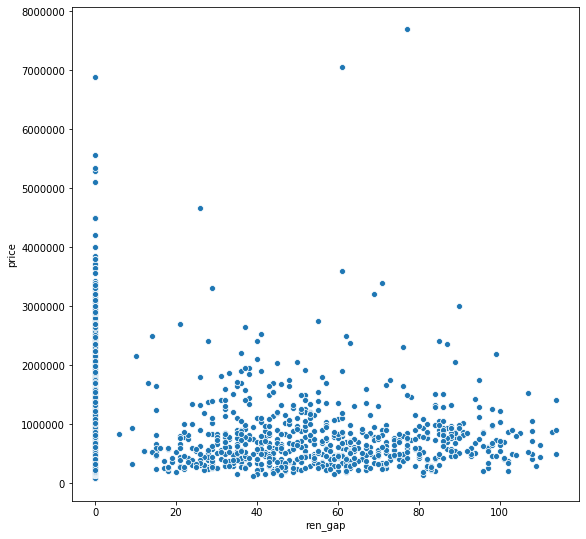

In [33]:
plt.figure(1, figsize=(20,20))
    
plt.subplot(2, 2,1)
sns.scatterplot(x='ren_gap', y='price', data=df)

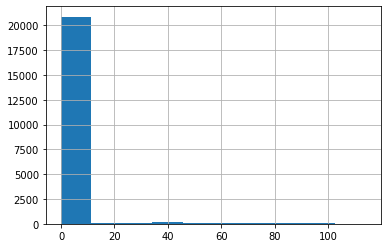

In [34]:
df['ren_gap'].hist()

In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0,...,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1,40.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0,0.0


# Dropping id as it provides no real analysis driving information

In [36]:
df.drop('id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,...,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0,0.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,...,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1,40.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,3,...,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0,0.0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,...,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0,0.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,...,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0,0.0


# Note:Make fig larger 

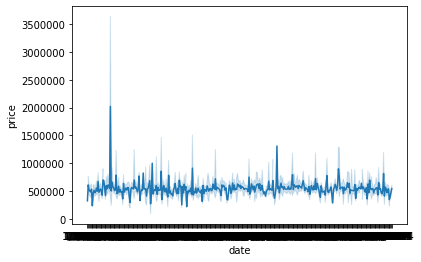

In [37]:
# sns.lineplot(x="date", y="price", data=df)

# Date dropped, to be revisited for time series analysis

In [38]:
df.drop('date', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1,40.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0,0.0


In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0,0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0,1,40.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0,0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0,0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0,0,0.0


# Imputing 0s and converting to int sqft_basement, which is also mostly 0s.

In [40]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
1816.0        1
862.0         1
588.0         1
2050.0        1
225.0         1
2360.0        1
516.0         1
2310.0        1
784.0         1
3480.0        1
2196.0        1
506.0         1
172.0         1
295.0         1
2390.0        1
2300.0        1
1880.0        1
652.0         1
276.0         1
2730.0        1
2180.0        1
518.0         1
2250.0        1
3260.0        1
65.0          1
143.0         1
1481.0        1
1008.0        1
248.0         1
1525.0        1
Name: sqft_basement, Len

In [41]:
df.sqft_basement[df.sqft_basement == "?"] = 0

df['sqft_basement'].value_counts()

/Users/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.0       12826
0           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
4130.0        1
2570.0        1
588.0         1
3500.0        1
1135.0        1
1248.0        1
1960.0        1
4820.0        1
1770.0        1
2400.0        1
1816.0        1
935.0         1
2120.0        1
2490.0        1
862.0         1
2050.0        1
2850.0        1
225.0         1
2500.0        1
946.0         1
508.0         1
2360.0        1
516.0         1
2310.0        1
784.0         1
3480.0        1
2196.0        1
506.0         1
172.0         1
417.0         1
Name: sqft_basement, Len

In [42]:
df['sqft_basement'] = df['sqft_basement'].astype('float32').astype(int)

df['sqft_basement'].value_counts()

0       13280
600       217
500       209
700       208
800       201
400       184
1000      148
900       142
300       142
200       105
750       104
530       103
480       103
450       103
720        98
620        90
580        84
840        83
420        81
860        79
1100       78
670        78
780        76
550        76
650        75
240        74
380        73
680        73
850        72
360        72
        ...  
2610        1
2850        1
915         1
20          1
276         1
143         1
516         1
2190        1
1284        1
2180        1
2196        1
2500        1
2580        1
374         1
2360        1
518         1
4820        1
1798        1
1990        1
2310        1
295         1
935         1
415         1
248         1
792         1
1816        1
1880        1
1960        1
2120        1
1135        1
Name: sqft_basement, Length: 303, dtype: int64

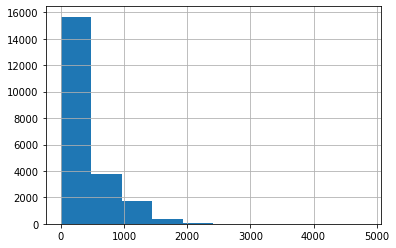

In [43]:
df['sqft_basement'].hist()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
view__0          21597 non-null float64
view__1          21597 non-null float64
view__2          21597 non-null float64
view__3          21597 non-null flo

# Creating boolean value of has basement

In [45]:
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [46]:
df['has_basement'].value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

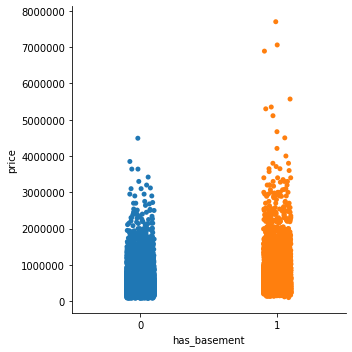

In [47]:
sns.catplot(x='has_basement', y='price', data=df)

# Question: What's the relative impact of years since a house was built, year renovated if it was renovated, years since renovations took place, and whether it was renovated or not on housing prices?

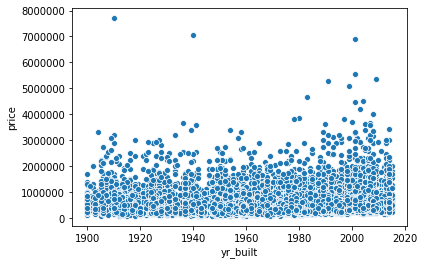

In [48]:
sns.scatterplot(x="yr_built", y='price', data=df)

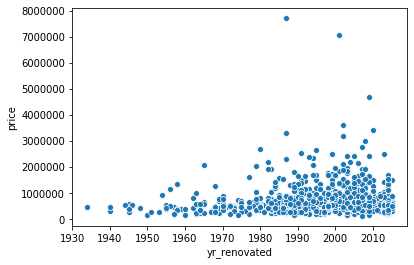

In [49]:
sns.scatterplot(x="yr_renovated", y="price", data= renovation_gap)

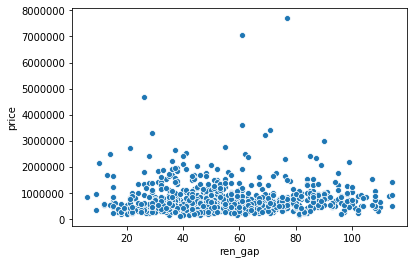

In [50]:
sns.scatterplot(x='ren_gap', y='price', data=renovation_gap)

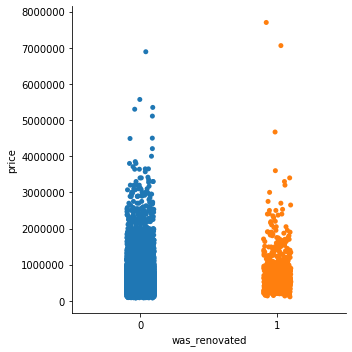

In [51]:
sns.catplot(x='was_renovated', y='price', data=df)

# Conclusions: When a house was built matters less than its renovation year if it was renovated when comparing to price, but it's not that important how many years since a house was built that it was renovated. Houses that weren't renovated, there are more and they tend to fetch higher prices.

# Question - how does living in the Seattle area effect prices?

In [52]:
seattlezips = [98188,98199,98174,98154,98158,98164,98101,98102,98103,98104,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98121,98122,98125,98126,98133,98134,98136,
98144]

df['seattle'] = df['zipcode'].apply(lambda i: 1 if i in seattlezips else 0)

In [53]:
df.seattle.value_counts()

0    14735
1     6862
Name: seattle, dtype: int64

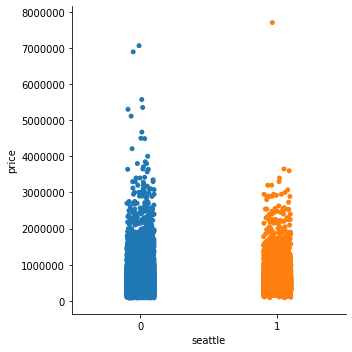

In [54]:
sns.catplot(x='seattle', y='price', data=df)

# TBD: Conclusion on plot here, is catplot the right type?

# TBD: Geographical plotting

# Zipcode, lat and long are mostly useful for geospatial analysis, dropping them for now 

In [55]:
df.drop(['zipcode', 'lat', 'long'], axis=1, inplace=True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap,has_basement,seattle
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,5650,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,7639,1.0,0.0,0.0,0.0,0.0,1,40.0,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,8062,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,5000,1.0,0.0,0.0,0.0,0.0,0,0.0,1,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,7503,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0


# Are there any other issues such as a predominance of 0s in the values of a column? - Bedrooms and Bathrooms look ordinal, as does floors and condition and grade

In [56]:
for col in df:
    print(df[col].value_counts(dropna=False))

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
250000.0    130
475000.0    120
330000.0    119
650000.0    117
275000.0    113
415000.0    111
315000.0    111
390000.0    110
600000.0    110
440000.0    109
280000.0    109
320000.0    107
435000.0    105
340000.0    103
310000.0    101
335000.0     98
420000.0     97
360000.0     96
260000.0     95
265000.0     94
           ... 
402395.0      1
575550.0      1
271310.0      1
242150.0      1
837500.0      1
608095.0      1
287653.0      1
484259.0      1
336800.0      1
873000.0      1
837700.0      1
118000.0      1
641200.0      1
969000.0      1
386180.0      1
608500.0      1
542950.0      1
968933.0      1
641250.0      1
575700.0      1
739500.0      1
575575.0      1
418900.0      1
234975.0      1
804995.0      1
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 362

# Label encoding -> One Hot Encoding with bedrooms

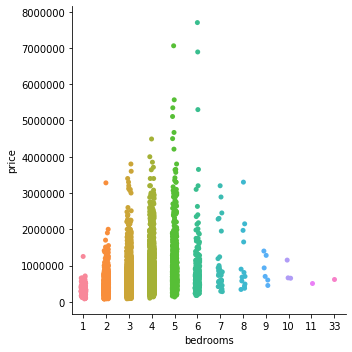

In [57]:
sns.catplot(x='bedrooms', y='price', data=df)

In [58]:
house_le = LabelEncoder()
house_labels = house_le.fit_transform(df['bedrooms'])
df['bedroom_label'] = house_labels
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap,has_basement,seattle,bedroom_label
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,1,40.0,1,1,2
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,1.0,0.0,0.0,0.0,0.0,0,0.0,1,1,3
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0,3,11,...,1.0,0.0,0.0,0.0,0.0,0,0.0,1,0,3
6,257500.0,3,2.25,1715,6819,2.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2
7,291850.0,3,1.50,1060,9711,1.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2
8,229500.0,3,1.00,1780,7470,1.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0,0.0,1,0,2
9,323000.0,3,2.50,1890,6560,2.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2


In [59]:
house_ohe = OneHotEncoder()
house_feature_arr = house_ohe.fit_transform(
                                df[['bedroom_label']]).toarray()
house_feature_labels = ['bedroom__'+str(cls_label) 
                           for cls_label in house_le.classes_]
house_features = pd.DataFrame(house_feature_arr, 
                            columns=house_feature_labels)

/Users/michael/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [60]:
df.reset_index(drop=True, inplace=True)
house_features.reset_index(drop=True, inplace=True)

In [61]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,view__0,view__1,view__2,view__3,view__4,was_renovated,ren_gap,has_basement,seattle,bedroom_label
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,1,40.0,1,1,2
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,1.0,0.0,0.0,0.0,0.0,0,0.0,1,1,3
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2


In [62]:
house_features.head()

,bedroom__1,bedroom__2,bedroom__3,bedroom__4,bedroom__5,bedroom__6,bedroom__7,bedroom__8,bedroom__9,bedroom__10,bedroom__11,bedroom__33
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df = pd.concat([df, house_features], axis=1)

df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bedroom__3,bedroom__4,bedroom__5,bedroom__6,bedroom__7,bedroom__8,bedroom__9,bedroom__10,bedroom__11,bedroom__33
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0,3,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,291850.0,3,1.50,1060,9711,1.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,229500.0,3,1.00,1780,7470,1.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,323000.0,3,2.50,1890,6560,2.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
sqft_living15    False
sqft_lot15       False
view__0          False
view__1          False
view__2          False
view__3          False
view__4          False
was_renovated    False
ren_gap          False
has_basement     False
seattle          False
bedroom_label    False
bedroom__1       False
bedroom__2       False
bedroom__3       False
bedroom__4       False
bedroom__5       False
bedroom__6       False
bedroom__7       False
bedroom__8       False
bedroom__9       False
bedroom__10      False
bedroom__11      False
bedroom__33      False
dtype: bool

In [65]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bedroom__3,bedroom__4,bedroom__5,bedroom__6,bedroom__7,bedroom__8,bedroom__9,bedroom__10,bedroom__11,bedroom__33
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Binning bathrooms into integers

In [66]:
bins = [0, 1,2,3,4,5]
df['binned'] = pd.cut(df['bathrooms'], bins,labels=False)

df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bedroom__4,bedroom__5,bedroom__6,bedroom__7,bedroom__8,bedroom__9,bedroom__10,bedroom__11,bedroom__33,binned
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0,3,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,291850.0,3,1.50,1060,9711,1.0,0.0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,229500.0,3,1.00,1780,7470,1.0,0.0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,323000.0,3,2.50,1890,6560,2.0,0.0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [67]:
df.binned.value_counts(dropna=False)

2.0    9362
1.0    6432
0.0    3926
3.0    1611
4.0     223
NaN      43
Name: binned, dtype: int64

In [68]:
df['binned'] = df['binned'].fillna(df['binned'].median())

In [69]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
view__0          0
view__1          0
view__2          0
view__3          0
view__4          0
was_renovated    0
ren_gap          0
has_basement     0
seattle          0
bedroom_label    0
bedroom__1       0
bedroom__2       0
bedroom__3       0
bedroom__4       0
bedroom__5       0
bedroom__6       0
bedroom__7       0
bedroom__8       0
bedroom__9       0
bedroom__10      0
bedroom__11      0
bedroom__33      0
binned           0
dtype: int64

In [70]:
df.binned.value_counts(dropna=False)

2.0    9405
1.0    6432
0.0    3926
3.0    1611
4.0     223
Name: binned, dtype: int64

In [71]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [72]:
len(df.bathrooms)

21597

In [73]:
len(df.binned)

21597

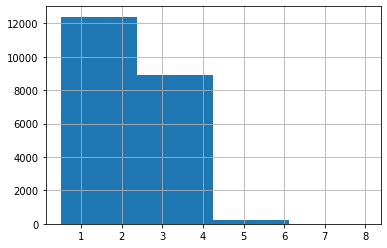

In [74]:
df['bathrooms'].hist(bins=4)

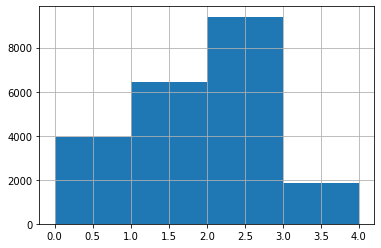

In [75]:
df['binned'].hist(bins=4)

# Comparing bathroom and bedroom vs. price - move to different stage in process

# Examining data visually before trimming outliers

In [76]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)
    
    plt.tight_layout()
    plt.show()

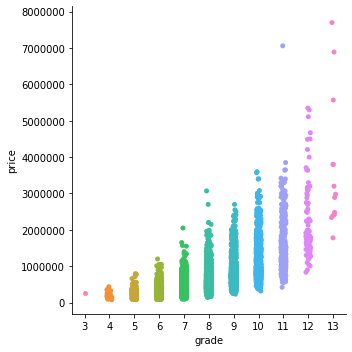

In [77]:
sns.catplot(x='grade', y="price", data=df)

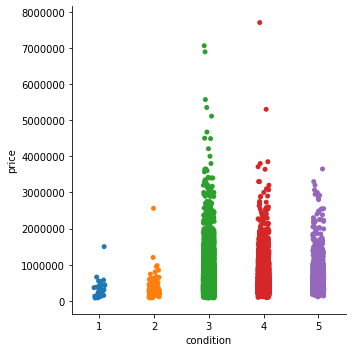

In [78]:
sns.catplot(x='condition', y="price", data=df)

In [79]:
for col in df.columns:
    diagnostic_plots(df,col)

In [80]:
#set figures large to be modified by tight_layout
plt.figure(1, figsize=(20,20))

#core function to create regplot(regression line fitted over scatterplot)
def multi_scatter_plot(x):
    #sns.regplot(df[x], df['price'])
    sns.scatterplot(x, y="price", data=df)
    
#iterating over dataframe minus redundant price column, adding subplots
for index, col in enumerate(df.drop(['price'], axis=1).columns, start=1):
    #adds subplot, using index to increment position of new subplot in a 5 column structure
    plt.subplot(5, 5,index)
    #call function to create plot
    multi_scatter_plot(col)
    
#tidy display for inline and show plot
plt.tight_layout()
plt.show()

# Question: What factors might be, without knowing how it's calculated, contributing to Grade of the housing?

In [81]:
len(df.columns)

39

In [82]:
# #set figures large to be modified by tight_layout
# plt.figure(1, figsize=(20,20))

# #core function to create regplot(regression line fitted over scatterplot)
# def multi_scatter_plot(x):
#     #sns.regplot(df[x], df['price'])
#     sns.scatterplot(x, y="grade", data=df)
    
# #iterating over dataframe minus redundant price column, adding subplots
# for index, col in enumerate(df.drop(['grade'], axis=1).columns, start=1):
#     #adds subplot, using index to increment position of new subplot in a 5 column structure
#     plt.subplot(14, 14,index)
#     #call function to create plot
#     multi_scatter_plot(col)
    
# #tidy display for inline and show plot
# plt.tight_layout()
# plt.show()

# Looks like bathrooms, square feet of space in various ways, and amount of floors might impact the grade

# Question - bedrooms or bathrooms, which has more of an impact on prices?

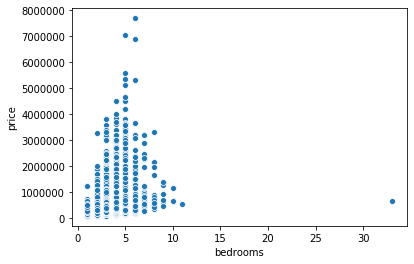

In [83]:
sns.scatterplot(x="bedrooms", y="price", data=df)

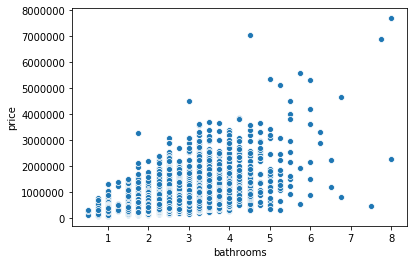

In [84]:
sns.scatterplot(x="bathrooms", y="price", data=df)

# Conclusion: Bathrooms seem to have a more direct relationship but it's worth revisiting this without the outliers especially in bedrooms

# Outlier trimming

In [85]:
z = np.abs(stats.zscore(df))
print(z)

[[0.86671627 0.40290302 1.45107268 ... 0.00680477 0.00680477 1.58310682]
 [0.00625157 0.40290302 0.17448579 ... 0.00680477 0.00680477 0.62507337]
 [0.98077344 1.48249316 1.45107268 ... 0.00680477 0.00680477 1.58310682]
 ...
 [0.37618606 1.48249316 1.77618438 ... 0.00680477 0.00680477 1.58310682]
 [0.38190525 0.40290302 0.49959749 ... 0.00680477 0.00680477 0.62507337]
 [0.58606486 1.48249316 1.77618438 ... 0.00680477 0.00680477 1.58310682]]


In [86]:
len(df)

21597

In [87]:
df = df[(z < 3).all(axis=1)]
len(df)

16572

In [88]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'view__0', 'view__1', 'view__2', 'view__3', 'view__4',
       'was_renovated', 'ren_gap', 'has_basement', 'seattle', 'bedroom_label',
       'bedroom__1', 'bedroom__2', 'bedroom__3', 'bedroom__4', 'bedroom__5',
       'bedroom__6', 'bedroom__7', 'bedroom__8', 'bedroom__9', 'bedroom__10',
       'bedroom__11', 'bedroom__33', 'binned'],
      dtype='object')

In [89]:
len(df.columns)

39

In [90]:
df = df.loc[:, df.any()]

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'view__0', 'has_basement', 'seattle',
       'bedroom_label', 'bedroom__2', 'bedroom__3', 'bedroom__4', 'binned'],
      dtype='object')

In [91]:
len(df.columns)

21

# Examining values with outliers trimmed

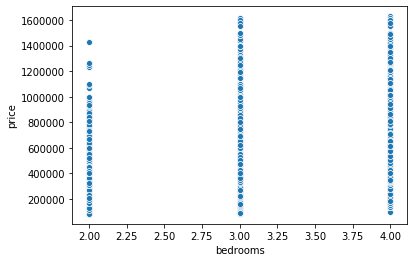

In [92]:
sns.scatterplot(x="bedrooms", y="price", data=df)

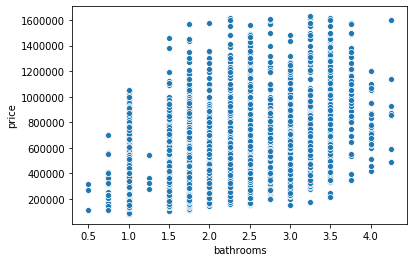

In [93]:
sns.scatterplot(x="bathrooms", y="price", data=df)

# Conclusion? Both are impactful?

# Log transforming variables - question: which variables to transform? A: Only ones with extreme skew.

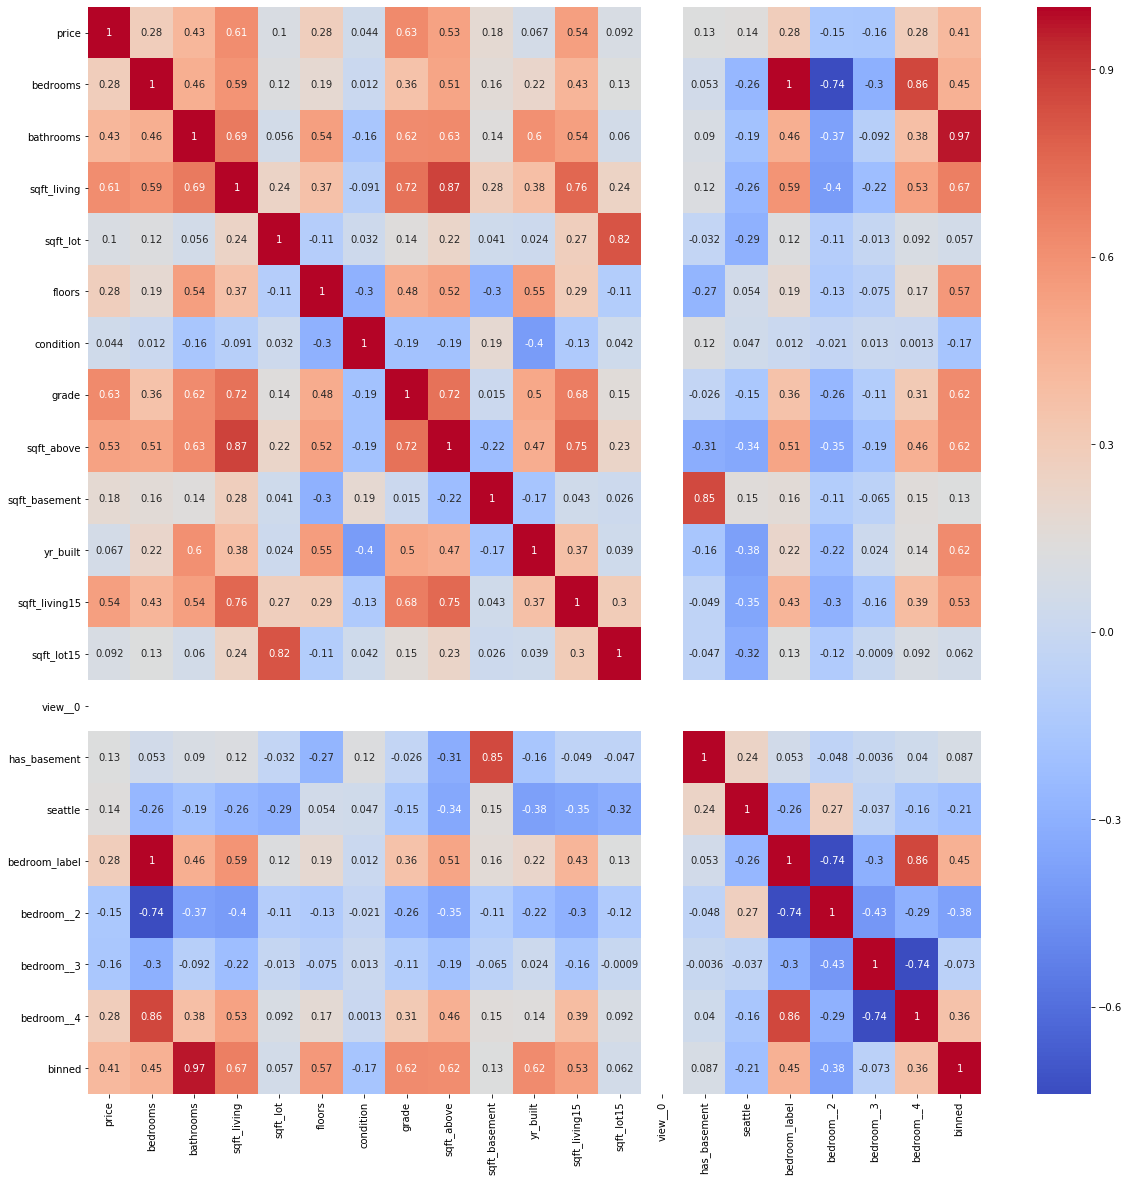

In [94]:
plt.figure(figsize=(20,20))
plt.tight_layout()
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [95]:
df['view__0'].value_counts(dropna=False)

1.0    16572
Name: view__0, dtype: int64

In [96]:
df.drop('view__0', axis=1, inplace=True)

In [97]:
for col in df.columns:
    diagnostic_plots(df,col)

In [98]:
for col in df[['price', 'bedrooms', 'bathrooms', 'floors',
        'grade', 'yr_built',
       'sqft_living15',]]:
    df[col] = np.log(df[col])
    diagnostic_plots(df,col)

# TBD:Summary of correlation plot

In [99]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'has_basement', 'seattle',
       'bedroom_label', 'bedroom__2', 'bedroom__3', 'bedroom__4', 'binned'],
      dtype='object')

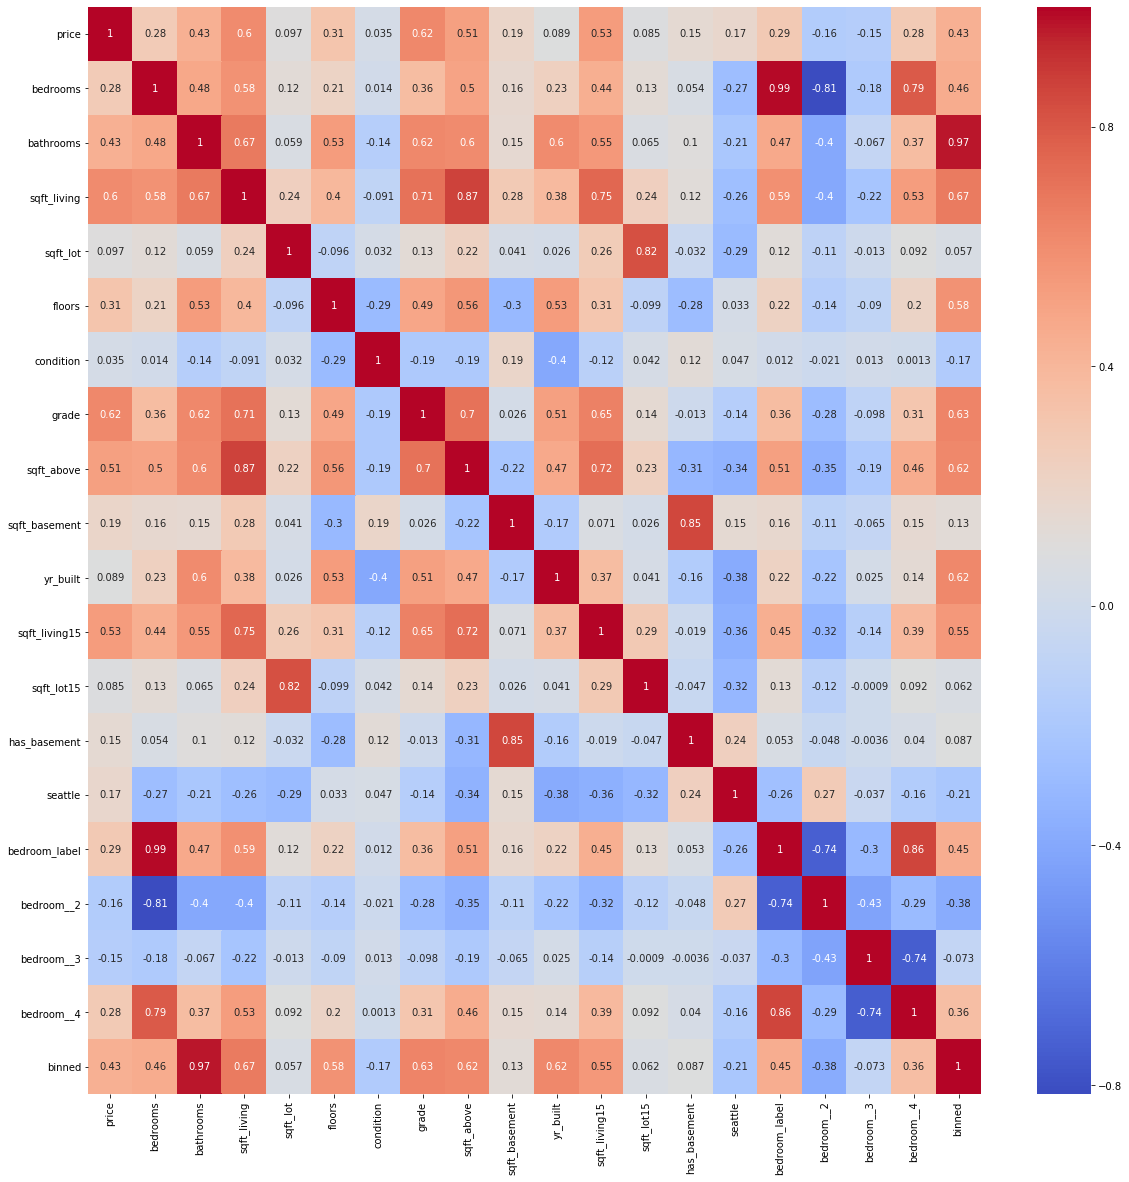

In [100]:
plt.figure(figsize=(20,20))
plt.tight_layout()
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [101]:
df.drop(['sqft_living15', 'sqft_lot15','sqft_above','bedroom_label', 'bedrooms', 'bathrooms', 'sqft_basement'], axis=1,inplace=True)

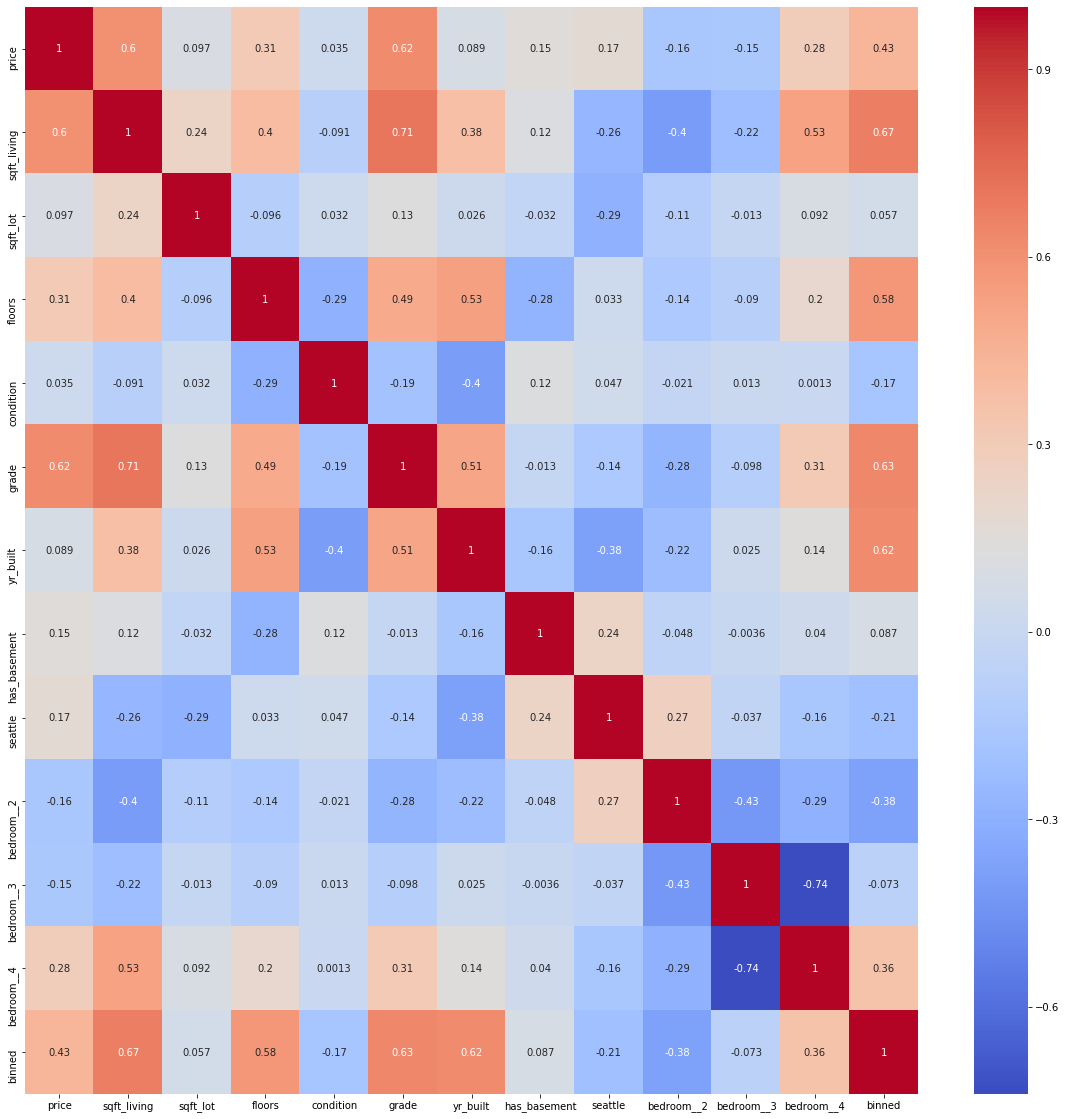

In [102]:
plt.figure(figsize=(20,20))
plt.tight_layout()
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [103]:
df.drop('bedroom__3', axis=1, inplace=True)

In [104]:
df.head()

,price,sqft_living,sqft_lot,floors,condition,grade,yr_built,has_basement,seattle,bedroom__2,bedroom__4,binned
0,12.309982,1180,5650,0.000000,3,1.945910,7.578145,0,0,0.0,0.0,0.0
2,12.100712,770,10000,0.000000,3,1.791759,7.566828,0,0,1.0,0.0,0.0
3,13.311329,1960,5000,0.000000,5,1.945910,7.583248,1,1,0.0,1.0,2.0
4,13.142166,1680,8080,0.000000,3,2.079442,7.594381,0,0,0.0,0.0,1.0
6,12.458775,1715,6819,0.693147,3,1.945910,7.598399,0,0,0.0,0.0,2.0


In [105]:
len(df.columns)

12

In [106]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'yr_built', 'has_basement', 'seattle', 'bedroom__2', 'bedroom__4',
       'binned'],
      dtype='object')

# Distribution of discrete features - violin plots - TBD: More descriptive plot, change variables in cat_feat

In [109]:
cat_feat = df[['bedrooms','floors','condition','grade']]
plt.figure(figsize=(10,10))
sns.violinplot(data=cat_feat)

# Scaling with MinMax, TBD: add kde plots

In [110]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'yr_built', 'has_basement', 'seattle', 'bedroom__2', 'bedroom__4',
       'binned'],
      dtype='object')

In [111]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df[['price', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built','binned']])
scaled_df = pd.DataFrame(scaled_df)

scaled_df.head(10)
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
# ax1.set_title('Before Scaling')
# sns.kdeplot(df['x1'], ax=ax1)
# sns.kdeplot(df['x2'], ax=ax1)
# sns.kdeplot(df['x3'], ax=ax1)
# ax2.set_title('After Min-Max Scaling')
# sns.kdeplot(scaled_df['x1'], ax=ax2)
# sns.kdeplot(scaled_df['x2'], ax=ax2)
# sns.kdeplot(scaled_df['x3'], ax=ax2)
# plt.show()

,0,1,2,3,4,5,6,7
0,0.332988,0.163895,0.037529,0.00000,0.333333,0.426748,0.485598,0.00
1,0.262989,0.066508,0.069352,0.00000,0.333333,0.231238,0.293018,0.00
2,0.667930,0.349169,0.032774,0.00000,1.000000,0.426748,0.572419,0.50
3,0.611347,0.282660,0.055306,0.00000,0.333333,0.596105,0.761879,0.25
4,0.382758,0.290974,0.046081,0.63093,0.333333,0.426748,0.830255,0.50
5,0.424643,0.135392,0.067238,0.00000,0.333333,0.426748,0.555090,0.25
6,0.344253,0.306413,0.050843,0.00000,0.333333,0.426748,0.529064,0.00
7,0.458565,0.332542,0.044186,0.63093,0.333333,0.426748,0.898356,0.50
8,0.582600,0.159145,0.040090,0.00000,0.666667,0.426748,0.372064,0.00
9,0.444824,0.223278,0.141784,0.36907,0.666667,0.426748,0.240116,0.00


# MODELING

# Modeling with Ordinary Least Squares with SM for better stats analysis of regression

In [112]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'yr_built', 'has_basement', 'seattle', 'bedroom__2', 'bedroom__4',
       'binned'],
      dtype='object')

In [115]:
predictors = df.drop('price', axis=1)
target = df['price']


X_train, X_test, y_train, y_test = train_test_split(predictors,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=0)
x_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model_fit = sm.OLS(y_train, x_train).fit()
results_df = pd.concat([x_train, y_train], axis=1)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1477.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:47:39   Log-Likelihood:                -2051.7
No. Observations:               11600   AIC:                             4127.
Df Residuals:                   11588   BIC:                             4216.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.8143      2.239     26.263      0.000      54.425      63.204
sqft_living      0.0002   7.18e-06     34.780      0.000       0.000       0.000
sqft_lot      9.433e-07    2.6e-07      3.622      0.000    4.33e-07    1.45e-06
floors           0.0370      0.012      3.168      0.002       0.014       0.060
condition        0.0539      0.005     11.541      0.000       0.045       0.063
grade            1.5492      0.032     48.030      0.000       1.486       1.612
yr_built        -6.5639      0.296    -22.146      0.000      -7.145      -5.983
has_basement     0.0043      0.007      0.627      0.531      -0.009       0.018
seattle          0.2546      0.008     33.327      0.000       0.240       0.270
bedroom__2       0.0452      0.009      5.195      0.000       0.028       0.062
bedroom__4      -0.0170      0.007     -2.491      0.013      -0.030      -0.004
binned           0.0486      0.006      8.524      0.000       0.037       0.060
==============================================================================
Omnibus:                       60.758   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.437
Skew:                           0.026   Prob(JB):                     1.70e-19
Kurtosis:                       3.420   Cond. No.                     1.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
predictions = model_fit.predict(X_test)

In [117]:
model_fit.conf_int()

,0,1
const,5.442455e+01,63.204014
sqft_living,2.356476e-04,0.000264
sqft_lot,4.327936e-07,0.000001
floors,1.410269e-02,0.059879
condition,4.478362e-02,0.063108
grade,1.486014e+00,1.612466
yr_built,-7.144905e+00,-5.982953
has_basement,-9.191033e-03,0.017829
seattle,2.396437e-01,0.269595
bedroom__2,2.816726e-02,0.062306


# Predictions analysis

Text(0, 0.5, 'Predicted Price')

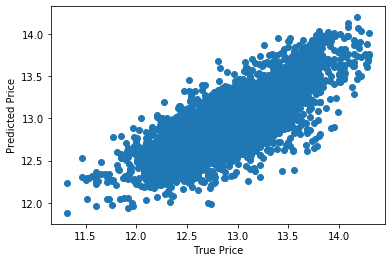

In [119]:
plt.scatter(y_test,predictions)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

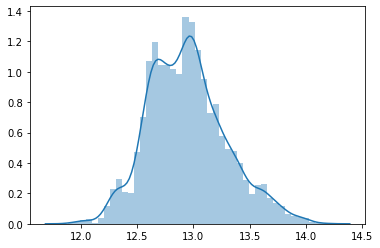

In [120]:
sns.distplot(predictions)

In [121]:
invert_log_pred = np.expm1(predictions)
invert_log_test= np.expm1(y_test)

In [122]:
invert_log_train = np.expm1(y_train)

Text(0, 0.5, 'Predicted Price - inverted log transform')

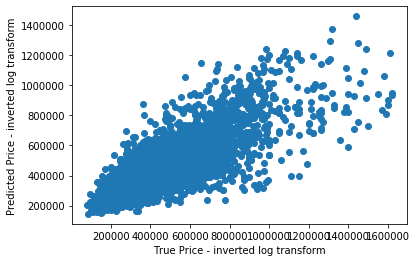

In [123]:
plt.scatter(invert_log_test,invert_log_pred)
plt.xlabel('True Price - inverted log transform')
plt.ylabel('Predicted Price - inverted log transform')

# To Explore: Include more variables, maybe keep at lower thresholds of corr, do these need an inverse transform?
# Residual plotting

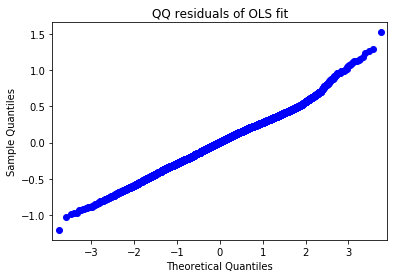

In [124]:
res = model_fit.resid # residuals
probplot = sm.ProbPlot(res)
fig = probplot.qqplot()
h = plt.title('QQ residuals of OLS fit')
plt.show()

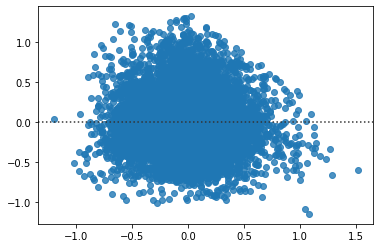

In [125]:
sns.residplot(model_fit.resid, model_fit.fittedvalues)

# Stepwise forward-backward feature selection

In [126]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [127]:
result = stepwise_selection(predictors, target, verbose=True)
print('resulting features:')
print(result)

Add  binned                         with p-value 0.0
Add  seattle                        with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 6.9579e-254
Add  condition                      with p-value 3.26001e-42
Add  bedroom__2                     with p-value 4.98102e-10
Add  sqft_lot                       with p-value 4.51007e-07
Add  floors                         with p-value 0.000111902
Add  bedroom__4                     with p-value 0.000170506
resulting features:
['binned', 'seattle', 'sqft_living', 'grade', 'yr_built', 'condition', 'bedroom__2', 'sqft_lot', 'floors', 'bedroom__4']


In [130]:
df_stepwise = df[['price','binned', 'seattle', 'sqft_living', 'grade', 'yr_built', 'condition', 'bedroom__2', 'sqft_lot', 'floors', 'bedroom__4']]

df_stepwise.head(10)

,price,binned,seattle,sqft_living,grade,yr_built,condition,bedroom__2,sqft_lot,floors,bedroom__4
0,12.309982,0.0,0,1180,1.945910,7.578145,3,0.0,5650,0.000000,0.0
2,12.100712,0.0,0,770,1.791759,7.566828,3,1.0,10000,0.000000,0.0
3,13.311329,2.0,1,1960,1.945910,7.583248,5,0.0,5000,0.000000,1.0
4,13.142166,1.0,0,1680,2.079442,7.594381,3,0.0,8080,0.000000,0.0
6,12.458775,2.0,0,1715,1.945910,7.598399,3,0.0,6819,0.693147,0.0
7,12.583995,1.0,0,1060,1.945910,7.582229,3,0.0,9711,0.000000,0.0
8,12.343658,0.0,0,1780,1.945910,7.580700,3,0.0,7470,0.000000,0.0
9,12.685408,2.0,0,1890,1.945910,7.602401,3,0.0,6560,0.693147,0.0
11,13.056224,0.0,1,1160,1.945910,7.571474,4,1.0,6000,0.000000,0.0
12,12.644328,0.0,0,1430,1.945910,7.563720,4,0.0,19901,0.405465,0.0


# Model off of stepwise features

In [131]:

X_train, X_test, y_train, y_test = train_test_split(df_stepwise.drop('price', axis=1),
                                                    df_stepwise['price'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
    #fit model
model_fit = sm.OLS(y_train, x_train).fit()

    #store results in dataframe for easier analysis
#     results_df = pd.concat([x_train, y_train], axis=1)
model_fit.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1625.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:50:25   Log-Likelihood:                -2051.9
No. Observations:               11600   AIC:                             4126.
Df Residuals:                   11589   BIC:                             4207.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.8085      2.239     26.261      0.000      54.419      63.198
binned          0.0495      0.005      9.004      0.000       0.039       0.060
seattle         0.2563      0.007     35.851      0.000       0.242       0.270
sqft_living     0.0003   7.05e-06     35.515      0.000       0.000       0.000
grade           1.5476      0.032     48.135      0.000       1.485       1.611
yr_built       -6.5629      0.296    -22.144      0.000      -7.144      -5.982
condition       0.0540      0.005     11.555      0.000       0.045       0.063
bedroom__2      0.0451      0.009      5.183      0.000       0.028       0.062
sqft_lot      9.33e-07    2.6e-07      3.590      0.000    4.24e-07    1.44e-06
floors          0.0337      0.010      3.234      0.001       0.013       0.054
bedroom__4     -0.0171      0.007     -2.514      0.012      -0.030      -0.004
==============================================================================
Omnibus:                       60.606   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.213
Skew:                           0.025   Prob(JB):                     1.90e-19
Kurtosis:                       3.419   Cond. No.                     1.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
predictions = model_fit.predict(X_test)

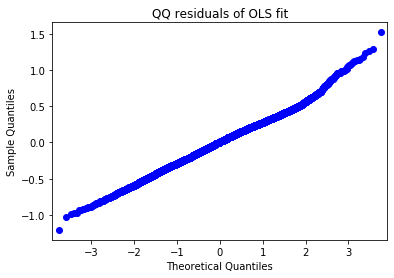

In [134]:
res = model_fit.resid # residuals
probplot = sm.ProbPlot(res)
fig = probplot.qqplot()
h = plt.title('QQ residuals of OLS fit')
plt.show()

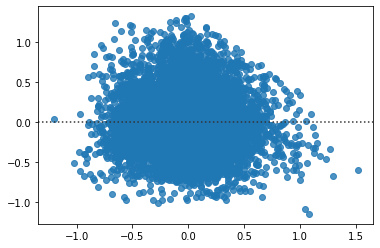

In [135]:
sns.residplot(model_fit.resid, model_fit.fittedvalues)

In [136]:
invert_log_pred = np.expm1(predictions)
invert_log_test= np.expm1(y_test)

In [137]:
invert_log_train = np.expm1(y_train)

Text(0, 0.5, 'Predicted Price - inverted log transform')

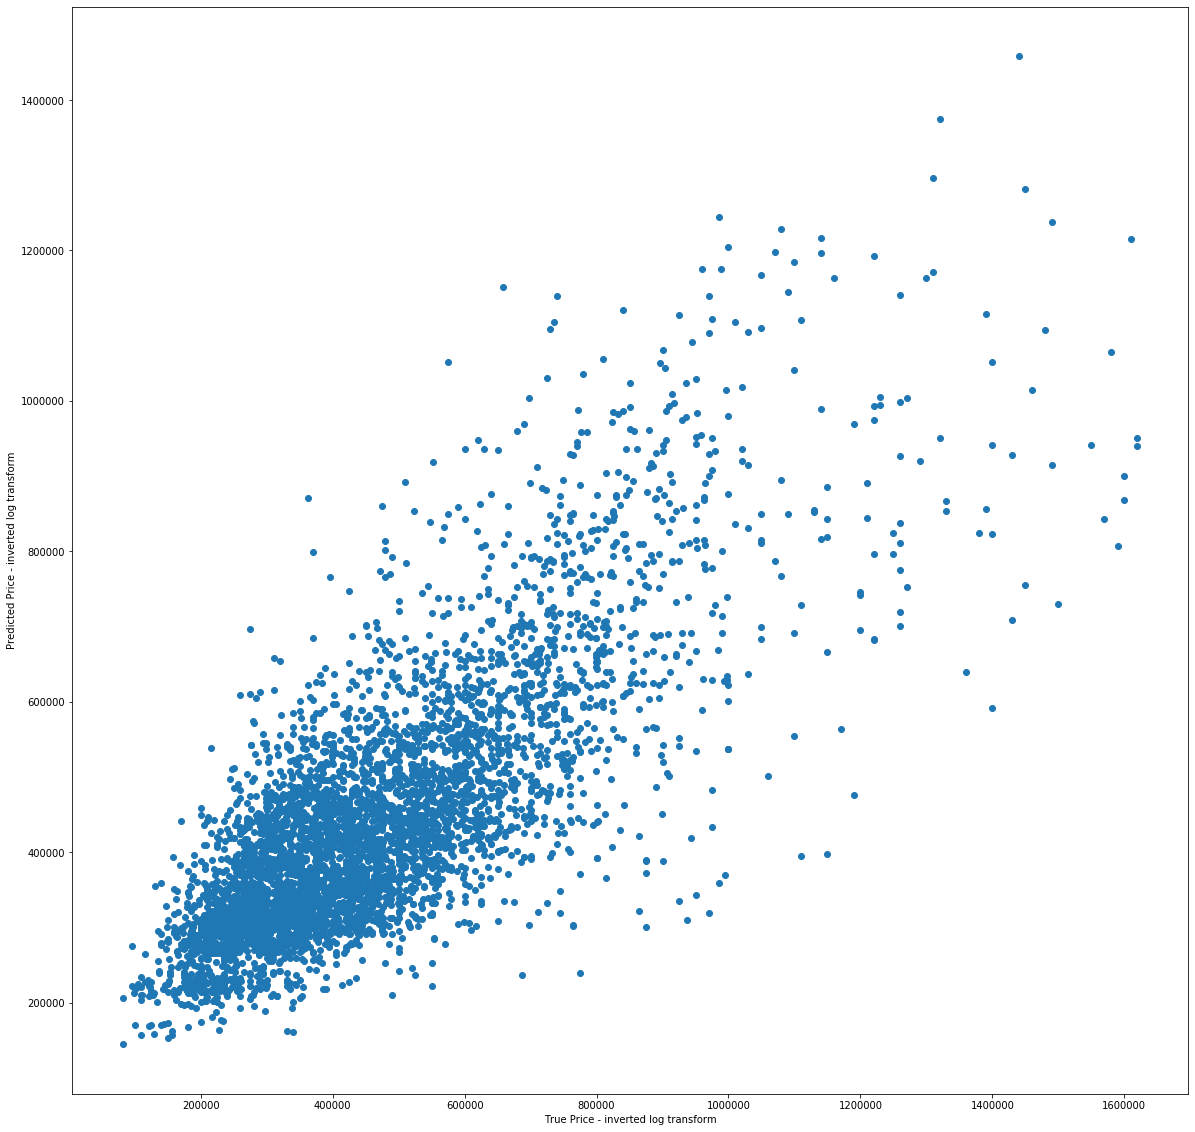

In [138]:
plt.figure(figsize=(20,20))
plt.scatter(invert_log_test,invert_log_pred)
plt.xlabel('True Price - inverted log transform')
plt.ylabel('Predicted Price - inverted log transform')

In [139]:
np.exp(model_fit.params)

const          3.469132e+25
binned         1.050752e+00
seattle        1.292150e+00
sqft_living    1.000251e+00
grade          4.700313e+00
yr_built       1.411856e-03
condition      1.055482e+00
bedroom__2     1.046151e+00
sqft_lot       1.000001e+00
floors         1.034259e+00
bedroom__4     9.830089e-01
dtype: float64

# HERE IS WHERE CONCLUSIONS ON THE MAIN MODEL GO

# TBD: Fix broken VIF Testing for colinearity

In [ ]:
# model_df = df[['bathrooms', 'yr_built', 'grade', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition', 'floors']]

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(df[['bathrooms', 'yr_built', 'grade', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition', 'floors']].values, i) for i in range(X.shape[1])]
# vif["features"] = model_df.columns

In [ ]:
# vif.round(1)

In [ ]:
# model_df.drop('sqft_living', axis=1, inplace=True)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df[['bathrooms', 'yr_built', 'grade', 'sqft_lot', 'bedrooms', 'condition', 'floors']],
#                                                     df['price'],
#                                                     test_size=0.3,
#                                                     random_state=0)
# x_train = sm.add_constant(X_train)
#     #fit model
# model_fit = sm.OLS(y_train, x_train).fit()
#     #store results in dataframe for easier analysis
# #     results_df = pd.concat([x_train, y_train], axis=1)
# model_fit.summary()
    

In [ ]:
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
# vif["features"] = model_df.columns
# vif.round(1)

In [ ]:
# model_df.drop('yr_built', axis=1, inplace=True)
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
# vif["features"] = model_df.columns
# vif.round(1)

# This was the threshold of features where multicolinearity seems to no longer be an issue in an earlier iteration of the model

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df[['bathrooms', 'grade', 'sqft_lot', 'bedrooms', 'condition', 'floors']],
#                                                     df['price'],
#                                                     test_size=0.3,
#                                                     random_state=0)
# x_train = sm.add_constant(X_train)
#     #fit model
# model_fit = sm.OLS(y_train, x_train).fit()
#     #store results in dataframe for easier analysis
# #     results_df = pd.concat([x_train, y_train], axis=1)
# model_fit.summary()
    

In [ ]:
# result = stepwise_selection(df[['bathrooms', 'grade', 'sqft_lot', 'bedrooms', 'condition', 'floors']], df['price'], verbose=True)
# print('resulting features:')
# print(result)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df[['bathrooms', 'grade', 'sqft_lot', 'bedrooms', 'condition']],
#                                                     df['price'],
#                                                     test_size=0.3,
#                                                     random_state=0)
# x_train = sm.add_constant(X_train)
#     #fit model
# model_fit = sm.OLS(y_train, x_train).fit()
#     #store results in dataframe for easier analysis
# #     results_df = pd.concat([x_train, y_train], axis=1)
# model_fit.summary()
    

In [ ]:
# model_df.drop('sqft_lot', axis=1, inplace=True)
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
# vif["features"] = model_df.columns
# vif.round(1)

In [ ]:
# model_df.drop('grade', axis=1, inplace=True)
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
# vif["features"] = model_df.columns
# vif.round(1)

In [ ]:
# model_df.drop('bedrooms', axis=1, inplace=True)
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
# vif["features"] = model_df.columns
# vif.round(1)

In [ ]:
# model_df.drop('bathrooms', axis=1, inplace=True)
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
# vif["features"] = model_df.columns
# vif.round(1)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df[['condition', 'floors']],
#                                                     df['price'],
#                                                     test_size=0.3,
#                                                     random_state=0)
# x_train = sm.add_constant(X_train)
#     #fit model
# model_fit = sm.OLS(y_train, x_train).fit()
#     #store results in dataframe for easier analysis
# #     results_df = pd.concat([x_train, y_train], axis=1)
# model_fit.summary()
    

# Looking to eliminate more multicolinearity

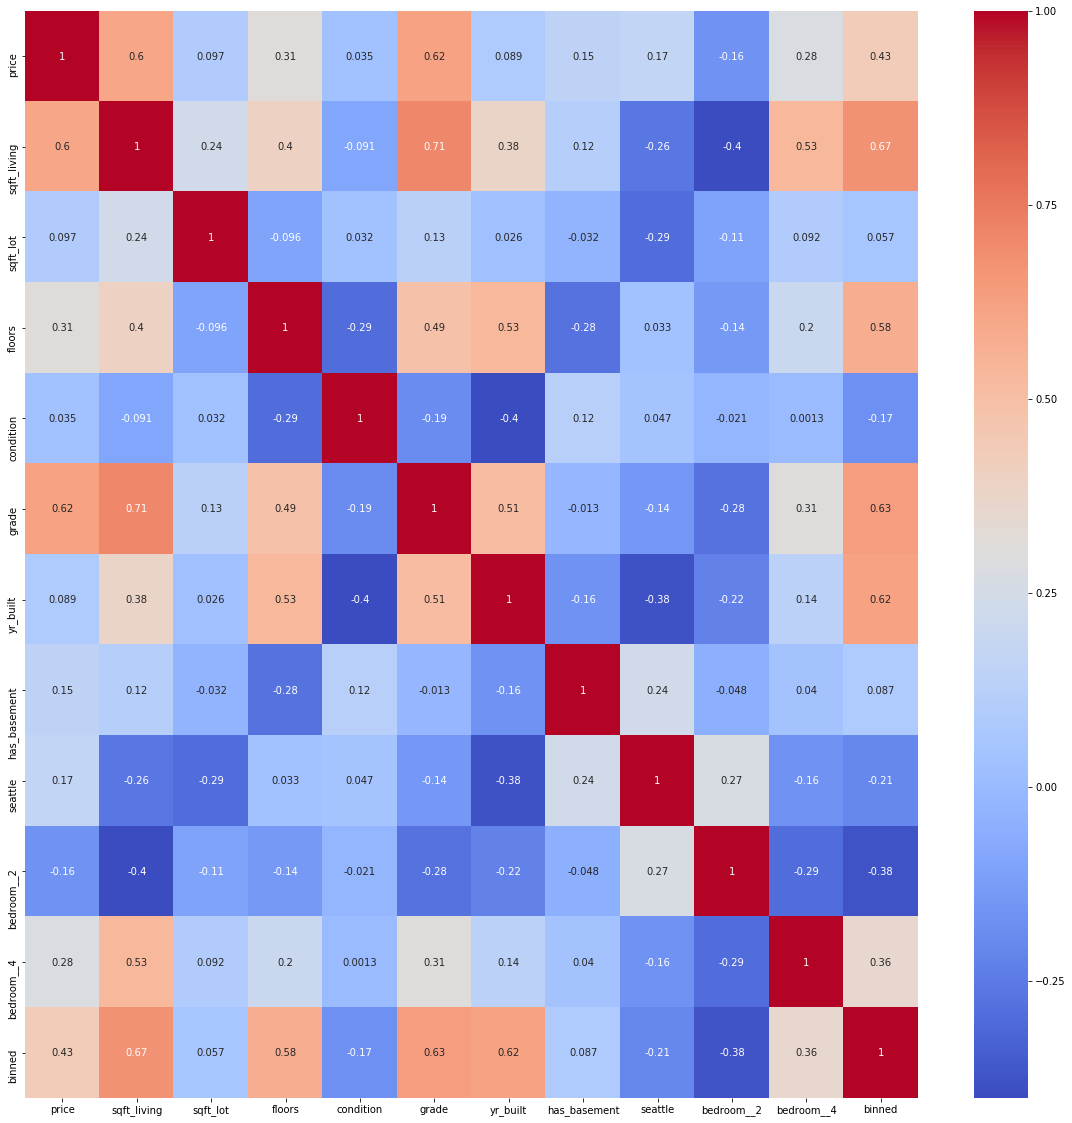

In [140]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [141]:
dfit1 = df.drop('sqft_living', axis=1)

In [142]:
dfit1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16572 entries, 0 to 21596
Data columns (total 11 columns):
price           16572 non-null float64
sqft_lot        16572 non-null int64
floors          16572 non-null float64
condition       16572 non-null int64
grade           16572 non-null float64
yr_built        16572 non-null float64
has_basement    16572 non-null int64
seattle         16572 non-null int64
bedroom__2      16572 non-null float64
bedroom__4      16572 non-null float64
binned          16572 non-null float64
dtypes: float64(7), int64(4)
memory usage: 1.5 MB


In [143]:
X_train, X_test, y_train, y_test = train_test_split(dfit1.drop('price', axis=1),
                                                    dfit1['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((11600, 10), (4972, 10))

In [144]:
X_train.columns

Index(['sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 'has_basement',
       'seattle', 'bedroom__2', 'bedroom__4', 'binned'],
      dtype='object')

In [145]:
X_train = sm.add_constant(X_train)

model_fit = sm.OLS(y_train, X_train).fit()

results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1362.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:26:15   Log-Likelihood:                -2627.6
No. Observations:               11600   AIC:                             5277.
Df Residuals:                   11589   BIC:                             5358.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.7285      2.315     31.409      0.000      68.190      77.267
sqft_lot      2.707e-06   2.68e-07     10.086      0.000    2.18e-06    3.23e-06
floors           0.0889      0.012      7.307      0.000       0.065       0.113
condition        0.0504      0.005     10.267      0.000       0.041       0.060
grade            2.1063      0.029     71.589      0.000       2.049       2.164
yr_built        -8.4995      0.306    -27.783      0.000      -9.099      -7.900
has_basement     0.0488      0.007      6.861      0.000       0.035       0.063
seattle          0.2008      0.008     25.542      0.000       0.185       0.216
bedroom__2       0.0115      0.009      1.265      0.206      -0.006       0.029
bedroom__4       0.0699      0.007     10.485      0.000       0.057       0.083
binned           0.1070      0.006     18.696      0.000       0.096       0.118
==============================================================================
Omnibus:                       47.410   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.640
Skew:                           0.034   Prob(JB):                     1.52e-14
Kurtosis:                       3.356   Cond. No.                     1.23e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
dfit2 = df.drop('condition', axis=1)

X_train, X_test, y_train, y_test = train_test_split(dfit2.drop('price', axis=1),
                                                    dfit2['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

model_fit = sm.OLS(y_train, X_train).fit()

results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     1593.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:26:16   Log-Likelihood:                -2118.0
No. Observations:               11600   AIC:                             4258.
Df Residuals:                   11589   BIC:                             4339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           67.2882      2.128     31.625      0.000      63.118      71.459
sqft_living      0.0002   7.22e-06     34.342      0.000       0.000       0.000
sqft_lot       9.36e-07   2.62e-07      3.574      0.000    4.23e-07    1.45e-06
floors           0.0238      0.012      2.039      0.041       0.001       0.047
grade            1.5477      0.032     47.712      0.000       1.484       1.611
yr_built        -7.6562      0.282    -27.104      0.000      -8.210      -7.103
has_basement     0.0057      0.007      0.826      0.409      -0.008       0.019
seattle          0.2482      0.008     32.386      0.000       0.233       0.263
bedroom__2       0.0395      0.009      4.523      0.000       0.022       0.057
bedroom__4      -0.0152      0.007     -2.222      0.026      -0.029      -0.002
binned           0.0560      0.006      9.831      0.000       0.045       0.067
==============================================================================
Omnibus:                       67.457   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.898
Skew:                           0.014   Prob(JB):                     3.35e-22
Kurtosis:                       3.452   Cond. No.                     1.19e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'yr_built', 'has_basement', 'seattle', 'bedroom__2', 'bedroom__4',
       'binned'],
      dtype='object')

In [ ]:
# Attempted feature selection including recursive feature eliminator

In [ ]:
# X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
#        'condition', 'grade', 'yr_built']].values
# y = df['price'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# regressor = LinearRegression()  
# regressor.fit(X_train, y_train)

In [ ]:
# y_pred = regressor.predict(X_test)

In [ ]:
# df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df6 = df.head(25)

In [ ]:
# df6.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [ ]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# # Create recursive feature eliminator that scores features by mean squared errors
# rfecv = RFECV(estimator=regressor, step=1, scoring='neg_mean_squared_error', cv=3)

# # Fit recursive feature eliminator 
# rfecv.fit(X, y)

# # Recursive feature elimination
# # rfecv.transform(X)
# X_new = rfecv.fit_transform(X, y)

In [ ]:
# print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
# plt.figure(figsize=(16, 9))
# plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
# plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
# plt.ylabel('% Correct', fontsize=14, labelpad=20)
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

# plt.show()

In [ ]:
# cv_5_results = np.mean(cross_val_score(regressor, X,y, cv=5, scoring='r2'))
# cv_10_results = np.mean(cross_val_score(regressor, X,y, cv=10, scoring='r2'))
# cv_20_results = np.mean(cross_val_score(regressor, X,y, cv=20, scoring='r2'))

# print('CV Results')
# print(f"Folds = 5, score={cv_5_results}")
# print(f"Folds = 10, score={cv_10_results}")
# print(f"Folds = 20, score={cv_20_results}")

# INCOMING TEXT DUMP OF MODELS, VISUALS LATER 

# Do bathrooms and bedrooms predict well price of housing?

In [148]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'yr_built', 'has_basement', 'seattle', 'bedroom__2', 'bedroom__4',
       'binned'],
      dtype='object')

# Doesn't work due to dropped bedroom 1 and 3

In [149]:
# dfit3 = df[['bedroom__1', 'bedroom__2', 'bedroom__3', 'bedroom__4','binned', 'price']]

# X_train, X_test, y_train, y_test = train_test_split(dfit3.drop('price', axis=1),
#                                                     dfit3['price'],
#                                                     test_size=0.3,
#                                                     random_state=0)

# X_train = sm.add_constant(X_train)

# model_fit = sm.OLS(y_train, X_train).fit()

# results_df = pd.concat([X_train, y_train], axis=1)

# model_fit.summary()

KeyError: "['bedroom__1', 'bedroom__3'] not in index"

# Which is more predictive, bedrooms or bathrooms?

In [ ]:
# dfit4 = df[['bedroom__1', 'bedroom__2', 'bedroom__3', 'bedroom__4',
#        'price']]

# X_train, X_test, y_train, y_test = train_test_split(dfit4.drop('price', axis=1),
#                                                     dfit4['price'],
#                                                     test_size=0.3,
#                                                     random_state=0)

# X_train = sm.add_constant(X_train)

# model_fit = sm.OLS(y_train, X_train).fit()

# results_df = pd.concat([X_train, y_train], axis=1)

# model_fit.summary()

In [150]:
dfit5 = df[['binned', 'price']]

X_train, X_test, y_train, y_test = train_test_split(dfit5.drop('price', axis=1),
                                                    dfit5['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

model_fit = sm.OLS(y_train, X_train).fit()

results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     2748.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:27:34   Log-Likelihood:                -5900.8
No. Observations:               11600   AIC:                         1.181e+04
Df Residuals:                   11598   BIC:                         1.182e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6325      0.007   1819.671      0.000      12.619      12.646
binned         0.2336      0.004     52.420      0.000       0.225       0.242
==============================================================================
Omnibus:                      116.714   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.192
Skew:                           0.085   Prob(JB):                     2.34e-18
Kurtosis:                       2.627   Cond. No.                         3.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# A model with a set of features around the general size of a dwelling

In [151]:
# dfsize = df[['bedroom__1', 'bedroom__2', 'bedroom__3', 'bedroom__4',
#         'binned','sqft_living','floors', 'price']]

# X_train, X_test, y_train, y_test = train_test_split(dfsize.drop('price', axis=1),
#                                                     dfsize['price'],
#                                                     test_size=0.3,
#                                                     random_state=0)

# X_train = sm.add_constant(X_train)

# #fit model, needed Y to be coerced to list for shape
# model_fit = sm.OLS(y_train, X_train).fit()

# #store results in dataframe for easier analysis
# results_df = pd.concat([X_train, y_train], axis=1)

# model_fit.summary()

KeyError: "['bedroom__1', 'bedroom__3'] not in index"

In [152]:
dfshape = df[['sqft_living','floors', 'price']]

X_train, X_test, y_train, y_test = train_test_split(dfshape.drop('price', axis=1),
                                                    dfshape['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

model_fit = sm.OLS(y_train, X_train).fit()

results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     3405.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:27:54   Log-Likelihood:                -4454.3
No. Observations:               11600   AIC:                             8915.
Df Residuals:                   11597   BIC:                             8937.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2136      0.010   1277.877      0.000      12.195      12.232
sqft_living     0.0004   5.21e-06     70.489      0.000       0.000       0.000
floors          0.1153      0.010     11.367      0.000       0.095       0.135
==============================================================================
Omnibus:                       82.408   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.467
Skew:                           0.014   Prob(JB):                     5.47e-13
Kurtosis:                       2.659   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# A model concerning the quality of a dwelling

In [153]:
dfquality = df[['condition','grade', 'price']]

X_train, X_test, y_train, y_test = train_test_split(dfquality.drop('price', axis=1),
                                                    dfquality['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

model_fit = sm.OLS(y_train, X_train).fit()

results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     4027.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:28:01   Log-Likelihood:                -4075.0
No. Observations:               11600   AIC:                             8156.
Df Residuals:                   11597   BIC:                             8178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1271      0.056    146.207      0.000       8.018       8.236
condition      0.1070      0.005     21.099      0.000       0.097       0.117
grade          2.2185      0.025     89.634      0.000       2.170       2.267
==============================================================================
Omnibus:                        0.793   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.823
Skew:                          -0.015   Prob(JB):                        0.663
Kurtosis:                       2.971   Cond. No.                         77.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Grade seems to be an overall strong predictor across models!

In [154]:
dfgrade = df[['grade', 'price']]

X_train, X_test, y_train, y_test = train_test_split(dfgrade.drop('price', axis=1),
                                                    dfgrade['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(y_train, X_train).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     7329.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:28:05   Log-Likelihood:                -4293.5
No. Observations:               11600   AIC:                             8591.
Df Residuals:                   11598   BIC:                             8606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6865      0.050    174.488      0.000       8.589       8.784
grade          2.1215      0.025     85.609      0.000       2.073       2.170
==============================================================================
Omnibus:                        6.150   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.082
Skew:                           0.044   Prob(JB):                       0.0478
Kurtosis:                       2.931   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analyzing by high and low percentages of the price of housing and the most performant model - doesn't include outliers which weakens the point

In [155]:
ninetyp = df.price.quantile(.9)

In [156]:
ninetyp = df[df.price > df.price.quantile(.90)]

In [157]:
ninetyp.columns

Index(['price', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'yr_built', 'has_basement', 'seattle', 'bedroom__2', 'bedroom__4',
       'binned'],
      dtype='object')

In [158]:
X_train, X_test, y_train, y_test = train_test_split(ninetyp.drop('price', axis=1),
                                                    ninetyp['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(y_train, X_train).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     20.25
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           9.44e-38
Time:                        15:28:12   Log-Likelihood:                 447.01
No. Observations:                1159   AIC:                            -870.0
Df Residuals:                    1147   BIC:                            -809.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           28.0590      3.749      7.485      0.000      20.703      35.415
sqft_living   6.939e-05   1.16e-05      5.969      0.000    4.66e-05    9.22e-05
sqft_lot     -7.164e-07   3.39e-07     -2.116      0.035   -1.38e-06    -5.2e-08
floors          -0.0513      0.022     -2.383      0.017      -0.094      -0.009
condition        0.0186      0.009      2.066      0.039       0.001       0.036
grade            0.3520      0.059      5.947      0.000       0.236       0.468
yr_built        -2.0279      0.494     -4.102      0.000      -2.998      -1.058
has_basement    -0.0123      0.013     -0.955      0.340      -0.038       0.013
seattle          0.0719      0.015      4.819      0.000       0.043       0.101
bedroom__2       0.0192      0.029      0.650      0.516      -0.039       0.077
bedroom__4      -0.0025      0.011     -0.223      0.824      -0.024       0.020
binned           0.0215      0.010      2.106      0.035       0.001       0.042
==============================================================================
Omnibus:                      183.624   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.898
Skew:                           1.112   Prob(JB):                     7.45e-61
Kurtosis:                       3.886   Cond. No.                     1.64e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
tenp = df[df.price > df.price.quantile(.10)]

X_train, X_test, y_train, y_test = train_test_split(tenp.drop('price', axis=1),
                                                    tenp['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(y_train, X_train).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1096.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:28:14   Log-Likelihood:                -778.08
No. Observations:               10439   AIC:                             1580.
Df Residuals:                   10427   BIC:                             1667.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           63.8096      2.135     29.892      0.000      59.625      67.994
sqft_living      0.0002   6.66e-06     32.246      0.000       0.000       0.000
sqft_lot      1.033e-06   2.47e-07      4.178      0.000    5.48e-07    1.52e-06
floors           0.0272      0.011      2.466      0.014       0.006       0.049
condition        0.0414      0.005      9.052      0.000       0.032       0.050
grade            1.4706      0.031     47.079      0.000       1.409       1.532
yr_built        -7.1728      0.282    -25.402      0.000      -7.726      -6.619
has_basement    -0.0078      0.006     -1.198      0.231      -0.021       0.005
seattle          0.1857      0.007     25.127      0.000       0.171       0.200
bedroom__2       0.0508      0.009      5.836      0.000       0.034       0.068
bedroom__4      -0.0161      0.006     -2.550      0.011      -0.028      -0.004
binned           0.0232      0.005      4.275      0.000       0.013       0.034
==============================================================================
Omnibus:                       67.528   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.449
Skew:                           0.136   Prob(JB):                     5.59e-18
Kurtosis:                       3.330   Cond. No.                     1.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
fiftyp = df[df.price > df.price.quantile(.50)]

X_train, X_test, y_train, y_test = train_test_split(fiftyp.drop('price', axis=1),
                                                    fiftyp['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(y_train, X_train).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     445.3
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:28:16   Log-Likelihood:                 1181.9
No. Observations:                5798   AIC:                            -2340.
Df Residuals:                    5786   BIC:                            -2260.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2220      2.121     21.790      0.000      42.063      50.381
sqft_living      0.0002    6.3e-06     25.980      0.000       0.000       0.000
sqft_lot     -7.067e-07   2.09e-07     -3.380      0.001   -1.12e-06   -2.97e-07
floors          -0.0053      0.011     -0.479      0.632      -0.027       0.016
condition        0.0412      0.005      8.810      0.000       0.032       0.050
grade            0.9634      0.032     30.321      0.000       0.901       1.026
yr_built        -4.6707      0.280    -16.661      0.000      -5.220      -4.121
has_basement    -0.0250      0.007     -3.826      0.000      -0.038      -0.012
seattle          0.0960      0.008     12.266      0.000       0.081       0.111
bedroom__2       0.0091      0.010      0.958      0.338      -0.010       0.028
bedroom__4      -0.0092      0.006     -1.488      0.137      -0.021       0.003
binned           0.0100      0.006      1.811      0.070      -0.001       0.021
==============================================================================
Omnibus:                      413.452   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.860
Skew:                           0.528   Prob(JB):                    5.37e-159
Kurtosis:                       4.379   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
sevenfp = df[df.price > df.price.quantile(.75)]

X_train, X_test, y_train, y_test = train_test_split(sevenfp.drop('price', axis=1),
                                                    sevenfp['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(y_train, X_train).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     145.7
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          1.12e-266
Time:                        15:28:17   Log-Likelihood:                 1020.6
No. Observations:                2880   AIC:                            -2017.
Df Residuals:                    2868   BIC:                            -1946.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.2586      2.512     14.435      0.000      31.333      41.184
sqft_living      0.0001   7.49e-06     17.134      0.000       0.000       0.000
sqft_lot     -9.629e-07   2.36e-07     -4.078      0.000   -1.43e-06      -5e-07
floors          -0.0416      0.014     -3.041      0.002      -0.068      -0.015
condition        0.0322      0.006      5.644      0.000       0.021       0.043
grade            0.6875      0.039     17.683      0.000       0.611       0.764
yr_built        -3.2475      0.332     -9.790      0.000      -3.898      -2.597
has_basement    -0.0191      0.008     -2.290      0.022      -0.035      -0.003
seattle          0.0735      0.010      7.492      0.000       0.054       0.093
bedroom__2       0.0215      0.014      1.501      0.134      -0.007       0.050
bedroom__4      -0.0131      0.007     -1.775      0.076      -0.028       0.001
binned           0.0160      0.007      2.355      0.019       0.003       0.029
==============================================================================
Omnibus:                      478.392   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.090
Skew:                           1.053   Prob(JB):                    9.36e-186
Kurtosis:                       4.633   Cond. No.                     1.52e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion - performance drops off at the highest percentiles, steadily

# TBD - Make modeling up to .summary() a function passing in dataframe, 
# visuals incl. of comparing model results maybe, 
# feature engineer a 'last_worked_on' off yr built and renovated
# learn how to actually read statsmodel results other than R-squared
# improve model

# STORYTELL

# OVERALL CONCLUSIONS GO HERE: